---
# 춘천시 빅데이터 공모전
---

### 폐공가 데이터 분석

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import openpyxl
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams['font.family'] = 'Malgun Gothic' # Windows 맑은 고딕
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = 15, 10

In [2]:
df1 = pd.read_excel('data/공공데이터 제공자료(춘천시빈집 현황).xlsx')
df2 = pd.read_csv('./data/강원도 춘천시_관광지 및 상권 정밀 위치기반 이용자 실태 현황_20211221.csv', encoding = 'cp949')

In [3]:
df1

,구분,법정동명,건축물_구조,건물용도,연면적,빈집등급,기준월
0,1,교동,일반목구조,단독주택(다가구),60.320,2등급,2019.10.
1,2,교동,벽돌구조,단독주택(다가구),50.191,2등급,2019.10.
2,3,교동,블록구조,단독주택(다가구),50.100,1등급,2019.10.
3,4,교동,일반목구조,단독주택(다가구),81.731,4등급,2019.10.
4,5,교동,없음,그 외 주택,489.420,1등급,2019.10.
...,...,...,...,...,...,...,...
421,422,교동,블록구조,단독주택(다가구),41.850,4등급,2020.01.
422,423,석사동,없음,그 외 주택,NaN,2등급,2020.01.
423,424,칠전동,없음,그 외 주택,NaN,1등급,2020.01.
424,425,신동,일반목구조,단독주택(다가구),98.640,1등급,2020.01.


In [4]:
df1.isna().sum()

구분         0
법정동명       0
건축물_구조     0
건물용도       0
연면적       78
빈집등급       0
기준월        0
dtype: int64

In [5]:
df1 = df1.dropna(how='any')

In [6]:
# 면적이 결측치인 행은 제거
# 면적순으로 정렬
df1 = df1.sort_values('연면적', ascending=False)
df1.drop('구분', axis = 1 , inplace = True)
df1

,법정동명,건축물_구조,건물용도,연면적,빈집등급,기준월
111,소양로3가,철근콘크리트구조,단독주택(다가구),525.2350,1등급,2019.10.
4,교동,없음,그 외 주택,489.4200,1등급,2019.10.
168,옥천동,철근콘크리트구조,공동주택(다세대/연립),461.8500,1등급,2019.10.
39,근화동,철근콘크리트구조,단독주택(다가구),431.0100,3등급,2019.10.
182,요선동,철근콘크리트구조,그 외 주택,410.0300,1등급,2019.10.
...,...,...,...,...,...,...
81,삼천동,벽돌구조,단독주택(다가구),17.5000,3등급,2019.10.
240,조양동,일반목구조,단독주택(다가구),16.1588,2등급,2019.10.
284,효자동,벽돌구조,단독주택(다가구),15.1200,1등급,2019.10.
62,봉의동,블록구조,단독주택(다가구),15.0778,1등급,2019.10.


In [7]:
# 빈집등급에서 '등급'을 삭제한다
df1.빈집등급 = df1.빈집등급.str.replace('등급', '')

In [8]:
# 기준월도 삭제
df1.drop('기준월', axis = 1, inplace = True)

In [9]:
df1

,법정동명,건축물_구조,건물용도,연면적,빈집등급
111,소양로3가,철근콘크리트구조,단독주택(다가구),525.2350,1
4,교동,없음,그 외 주택,489.4200,1
168,옥천동,철근콘크리트구조,공동주택(다세대/연립),461.8500,1
39,근화동,철근콘크리트구조,단독주택(다가구),431.0100,3
182,요선동,철근콘크리트구조,그 외 주택,410.0300,1
...,...,...,...,...,...
81,삼천동,벽돌구조,단독주택(다가구),17.5000,3
240,조양동,일반목구조,단독주택(다가구),16.1588,2
284,효자동,벽돌구조,단독주택(다가구),15.1200,1
62,봉의동,블록구조,단독주택(다가구),15.0778,1


In [10]:
# 3, 4 등급 제외(재건축이아니니까)
# 66m^2 최소 기준으로 제거 (최소 4인)
df1 = df1[(df1['빈집등급'] == '1') | (df1['빈집등급'] == '2')]
df1 = df1[df1.연면적 >= 66]
df1

,법정동명,건축물_구조,건물용도,연면적,빈집등급
111,소양로3가,철근콘크리트구조,단독주택(다가구),525.2350,1
4,교동,없음,그 외 주택,489.4200,1
168,옥천동,철근콘크리트구조,공동주택(다세대/연립),461.8500,1
182,요선동,철근콘크리트구조,그 외 주택,410.0300,1
314,효자동,벽돌구조,단독주택(다가구),349.4700,1
...,...,...,...,...,...
161,약사동,일반목구조,단독주택(다가구),66.8130,1
11,교동,블록구조,단독주택(다가구),66.5900,2
241,조양동,블록구조,단독주택(다가구),66.5391,2
339,효자동,일반목구조,단독주택(다가구),66.3900,1


In [11]:
df1.법정동명.value_counts()

효자동      33
후평동      13
운교동      10
교동        9
우두동       8
약사동       6
퇴계동       6
조양동       5
삼천동       5
신동        5
죽림동       4
근화동       4
소양로3가     4
소양로2가     4
중앙로3가     4
사농동       3
요선동       2
온의동       2
옥천동       2
낙원동       2
소양로4가     2
봉의동       1
Name: 법정동명, dtype: int64

In [12]:
df1[df1.법정동명 == '효자동']

,법정동명,건축물_구조,건물용도,연면적,빈집등급
314,효자동,벽돌구조,단독주택(다가구),349.470,1
349,효자동,철근콘크리트구조,단독주택(다가구),234.754,1
342,효자동,벽돌구조,단독주택(다가구),183.338,1
341,효자동,벽돌구조,단독주택(다가구),154.770,2
394,효자동,벽돌구조,단독주택(다가구),144.890,1
392,효자동,벽돌구조,단독주택(다가구),143.930,1
269,효자동,없음,그 외 주택,123.200,1
277,효자동,벽돌구조,단독주택(다가구),116.630,1
293,효자동,벽돌구조,단독주택(다가구),116.090,1
297,효자동,일반목구조,단독주택(다가구),115.444,1


In [13]:
df1_size = df1.groupby('법정동명').mean().reset_index()
df1_size = df1_size.sort_values('연면적', ascending=False)
df1_size

,법정동명,연면적
11,옥천동,311.315000
13,요선동,242.455000
7,소양로3가,233.158750
0,교동,147.991000
6,소양로2가,128.746000
15,운교동,128.202890
21,후평동,127.163077
5,삼천동,111.802200
20,효자동,107.320818
1,근화동,106.674750


In [14]:
df1_count = df1.groupby('법정동명').count().reset_index()
df1_count = df1_count[['법정동명', '건축물_구조']]
df1_count = df1_count.sort_values('건축물_구조', ascending=False)
df1_count

,법정동명,건축물_구조
20,효자동,33
21,후평동,13
15,운교동,10
0,교동,9
14,우두동,8
10,약사동,6
19,퇴계동,6
9,신동,5
5,삼천동,5
16,조양동,5


In [15]:
# 법정동을 기준으로 합친다
df_empty = pd.merge(df1_size, df1_count)
df_empty

,법정동명,연면적,건축물_구조
0,옥천동,311.315000,2
1,요선동,242.455000,2
2,소양로3가,233.158750,4
3,교동,147.991000,9
4,소양로2가,128.746000,4
5,운교동,128.202890,10
6,후평동,127.163077,13
7,삼천동,111.802200,5
8,효자동,107.320818,33
9,근화동,106.674750,4


In [16]:
df_empty.columns = ['읍면동', '연면적', '계']
df_empty

,읍면동,연면적,계
0,옥천동,311.315000,2
1,요선동,242.455000,2
2,소양로3가,233.158750,4
3,교동,147.991000,9
4,소양로2가,128.746000,4
5,운교동,128.202890,10
6,후평동,127.163077,13
7,삼천동,111.802200,5
8,효자동,107.320818,33
9,근화동,106.674750,4


# 이용자정보

In [17]:
# 날짜를 시계열로
df2.날짜 = pd.to_datetime(df2.날짜)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984662 entries, 0 to 984661
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   상호명      984662 non-null  object        
 1   날짜       984662 non-null  datetime64[ns]
 2   업종       984662 non-null  object        
 3   위도       984662 non-null  float64       
 4   경도       984662 non-null  float64       
 5   시도       984662 non-null  object        
 6   시군구      984662 non-null  object        
 7   읍면동      984662 non-null  object        
 8   이용자수     984662 non-null  int64         
 9   남성비율     984662 non-null  float64       
 10  여성비율     984662 non-null  float64       
 11  10대비율    984662 non-null  float64       
 12  20대비율    984662 non-null  float64       
 13  30대비율    984662 non-null  float64       
 14  40대비율    984662 non-null  float64       
 15  50대이상비율  984662 non-null  float64       
 16  데이터기준일   984662 non-null  object        
dtypes: datetim

In [18]:
df2.읍면동.value_counts()

석사동        254492
동내면 거두리     82106
후평동         76372
효자동         74542
근화동         65758
            ...  
소양동           244
강남동           244
봉의동           244
신북읍 지내리       122
신북읍 유포리       122
Name: 읍면동, Length: 71, dtype: int64

In [19]:
# 읍면동에서 xx리를 제거한다
idx = df2[df2['읍면동'].str.endswith('리')].index
dong = df2[df2['읍면동'].str.endswith('리')]

In [20]:
df2.loc[idx,'읍면동']= dong.읍면동.str.split(' ').str[0]
df2.head()

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일
0,(주)화천레미콘,2021-07-19,기타시설,37.851783,127.750995,강원,춘천시,석사동,551,26.17,73.83,0.97,2.47,1.36,4.14,91.06,2021-12-21
1,여의도순복음춘천교회,2021-07-19,종교시설,37.849759,127.755033,강원,춘천시,동내면,79,42.50,57.50,13.22,18.84,25.55,21.69,20.70,2021-12-21
2,디자인카페티이오,2021-07-19,카페,37.884288,127.728886,강원,춘천시,요선동,95,46.24,53.76,13.52,20.90,21.89,21.74,21.95,2021-12-21
3,브이스페이스(VSpace),2021-07-19,카페,37.815480,127.716347,강원,춘천시,신동면,72,55.17,44.83,10.38,20.74,20.02,22.26,26.60,2021-12-21
4,오꼬만봄내점,2021-07-19,음식점,37.855721,127.745546,강원,춘천시,석사동,315,28.96,71.04,15.33,21.03,19.13,22.74,21.77,2021-12-21


In [21]:
df2.읍면동.sort_values().unique(), len(df2.읍면동.sort_values().unique())

(array(['강남동', '교동', '근화동', '낙원동', '남산면', '동내면', '동면', '동산면', '봉의동', '북산면',
        '사농동', '사북면', '삼천동', '서면', '석사동', '소양동', '소양로1가', '소양로2가', '소양로3가',
        '소양로4가', '송암동', '신동', '신동면', '신북읍', '약사동', '옥천동', '온의동', '요선동',
        '우두동', '운교동', '조양동', '죽림동', '중앙로1가', '중앙로2가', '중앙로3가', '칠전동',
        '퇴계동', '효자동', '후평동'], dtype=object),
 39)

### df_empty, df2의 행정동명을 변경한다

In [22]:
# 딕셔너리로 맵핑
mapper = {'낙원동': '소양동', '봉의동' : '소양동', '사농동' : '신사우동', '삼천동' : '강남동', '소양로1가' : '소양동', '소양로2가' : '소양동',
    '소양로3가' : '소양동', '소양로4가' : '소양동', '송암동' : '강남동', '신동' : '신사우동', '약사동' : '약사명동', '옥천동' : '소양동',
    '온의동' : '강남동', '요선동' : '소양동', '우두동' : '신사우동', '운교동' : '조운동', '조양동' : '조운동', '죽림동' : '약사명동',
    '중앙로1가' : '소양동', '중앙로2가' : '약사명동', '중앙로3가' : '약사명동' , '칠전동' : '강남동', '석사동' : '효자동'
}

In [23]:
# 인덱스를 가져온다
idx2 = df2.query('읍면동 in @mapper').index
idx3 = df_empty.query('읍면동 in @mapper').index
idx3

Int64Index([0, 1, 2, 4, 5, 7, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21], dtype='int64')

In [24]:
# 뒤집어준다
df2.loc[idx2, '읍면동'] = df2.loc[idx2, '읍면동'].map(mapper)
df_empty.loc[idx3, '읍면동'] = df_empty.loc[idx3, '읍면동'].map(mapper)

In [25]:
# 결과확인
df2.읍면동.unique()

array(['효자동', '동내면', '소양동', '신동면', '퇴계동', '약사명동', '동면', '서면', '후평동',
       '근화동', '조운동', '강남동', '교동', '신사우동', '동산면', '남산면', '사북면', '신북읍',
       '북산면'], dtype=object)

In [26]:
# 결과확인2
df_empty.읍면동.unique()

array(['소양동', '교동', '조운동', '후평동', '강남동', '효자동', '근화동', '신사우동', '퇴계동',
       '약사명동'], dtype=object)

In [27]:
df_user = df2.groupby('읍면동')[['이용자수']].mean().reset_index()
df_user

,읍면동,이용자수
0,강남동,443.537866
1,교동,131.005342
2,근화동,206.389306
3,남산면,149.800060
4,동내면,235.911001
5,동면,387.697120
6,동산면,86.139560
7,북산면,9727.698613
8,사북면,81.202869
9,서면,94.866311


In [28]:
df_empty

,읍면동,연면적,계
0,소양동,311.315000,2
1,소양동,242.455000,2
2,소양동,233.158750,4
3,교동,147.991000,9
4,소양동,128.746000,4
5,조운동,128.202890,10
6,후평동,127.163077,13
7,강남동,111.802200,5
8,효자동,107.320818,33
9,근화동,106.674750,4


In [29]:
df_empty = df_empty.groupby('읍면동').agg({'연면적' : 'mean', '계' : 'sum'}).reset_index().sort_values(['연면적', '계'], ascending = False)
df_empty

,읍면동,연면적,계
3,소양동,171.172529,17
1,교동,147.991000,9
9,후평동,127.163077,13
6,조운동,113.608155,15
8,효자동,107.320818,33
2,근화동,106.674750,4
0,강남동,99.681100,7
7,퇴계동,92.779833,6
4,신사우동,91.231560,16
5,약사명동,80.249839,14


In [30]:
df_user = df_user[df_user['읍면동'].str.endswith('동')]
df_user

,읍면동,이용자수
0,강남동,443.537866
1,교동,131.005342
2,근화동,206.389306
10,소양동,3915.977677
13,신사우동,176.808801
14,약사명동,2170.440333
15,조운동,3819.259138
16,퇴계동,1477.442236
17,효자동,714.693779
18,후평동,310.898850


In [31]:
df_empty.count(), df_user.count()

(읍면동    10
 연면적    10
 계      10
 dtype: int64,
 읍면동     10
 이용자수    10
 dtype: int64)

In [32]:
df_empty.sort_values('읍면동')

,읍면동,연면적,계
0,강남동,99.681100,7
1,교동,147.991000,9
2,근화동,106.674750,4
3,소양동,171.172529,17
4,신사우동,91.231560,16
5,약사명동,80.249839,14
6,조운동,113.608155,15
7,퇴계동,92.779833,6
8,효자동,107.320818,33
9,후평동,127.163077,13


In [33]:
df_user.sort_values('읍면동')

,읍면동,이용자수
0,강남동,443.537866
1,교동,131.005342
2,근화동,206.389306
10,소양동,3915.977677
13,신사우동,176.808801
14,약사명동,2170.440333
15,조운동,3819.259138
16,퇴계동,1477.442236
17,효자동,714.693779
18,후평동,310.898850


In [34]:
df_sum = pd.merge(df_user, df_empty)
df_sum.columns = ['읍면동', '이용자수', '연면적', '폐공가수']
df_sum = df_sum.sort_values('읍면동', ascending=True)
df_sum

,읍면동,이용자수,연면적,폐공가수
0,강남동,443.537866,99.681100,7
1,교동,131.005342,147.991000,9
2,근화동,206.389306,106.674750,4
3,소양동,3915.977677,171.172529,17
4,신사우동,176.808801,91.231560,16
5,약사명동,2170.440333,80.249839,14
6,조운동,3819.259138,113.608155,15
7,퇴계동,1477.442236,92.779833,6
8,효자동,714.693779,107.320818,33
9,후평동,310.898850,127.163077,13


In [68]:
# 이용자수 정리
df_sum.이용자수 = df_sum.이용자수.map(lambda x : round(x, 2))
df_sum.연면적 = df_sum.연면적.map(lambda x : round(x, 2))
df_sum

,읍면동,이용자수,연면적,폐공가수
0,강남동,443.54,99.68,7
1,교동,131.01,147.99,9
2,근화동,206.39,106.67,4
3,소양동,3915.98,171.17,17
4,신사우동,176.81,91.23,16
5,약사명동,2170.44,80.25,14
6,조운동,3819.26,113.61,15
7,퇴계동,1477.44,92.78,6
8,효자동,714.69,107.32,33
9,후평동,310.90,127.16,13


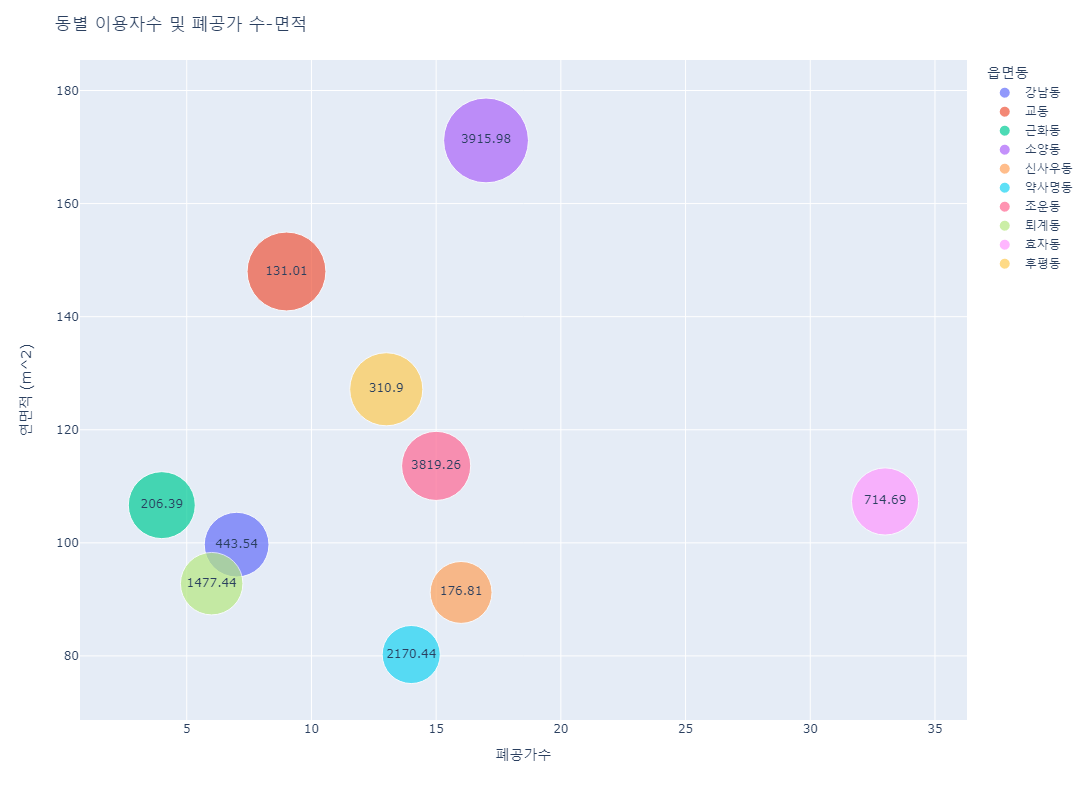

In [87]:
fig = px.scatter(df_sum, x='폐공가수', y='연면적', size= '연면적', color = '읍면동', text = '이용자수', size_max=60)

fig.update_layout(title_text="동별 이용자수 및 폐공가 수-면적", height=800)
# fig.update_traces(textposition='top center')
fig.update_xaxes(title_text ='폐공가수')
fig.update_yaxes(title_text ='연면적 (m^2)')

fig.show()

In [99]:
df2

,상호명,날짜,업종,위도,경도,시도,시군구,읍면동,이용자수,남성비율,여성비율,10대비율,20대비율,30대비율,40대비율,50대이상비율,데이터기준일
0,(주)화천레미콘,2021-07-19,기타시설,37.851783,127.750995,강원,춘천시,효자동,551,26.17,73.83,0.97,2.47,1.36,4.14,91.06,2021-12-21
1,여의도순복음춘천교회,2021-07-19,종교시설,37.849759,127.755033,강원,춘천시,동내면,79,42.50,57.50,13.22,18.84,25.55,21.69,20.70,2021-12-21
2,디자인카페티이오,2021-07-19,카페,37.884288,127.728886,강원,춘천시,소양동,95,46.24,53.76,13.52,20.90,21.89,21.74,21.95,2021-12-21
3,브이스페이스(VSpace),2021-07-19,카페,37.815480,127.716347,강원,춘천시,신동면,72,55.17,44.83,10.38,20.74,20.02,22.26,26.60,2021-12-21
4,오꼬만봄내점,2021-07-19,음식점,37.855721,127.745546,강원,춘천시,효자동,315,28.96,71.04,15.33,21.03,19.13,22.74,21.77,2021-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984657,블랙박스,2021-11-17,의류판매,37.879256,127.728921,강원,춘천시,조운동,61713,46.29,53.71,27.70,17.58,17.61,15.24,21.87,2021-12-21
984658,뉴욕바닷가재,2021-11-17,음식점,37.841142,127.766668,강원,춘천시,동내면,71,54.29,45.71,14.88,18.76,22.37,21.64,22.35,2021-12-21
984659,봄시내재가노인복지센터,2021-11-17,기타시설,37.881195,127.759578,강원,춘천시,동면,97,54.30,45.70,16.68,15.44,22.66,25.20,20.02,2021-12-21
984660,춘천2번지닭갈비,2021-11-17,음식점,37.852734,127.747395,강원,춘천시,효자동,126,22.43,77.57,14.71,20.51,18.51,25.04,21.23,2021-12-21


In [97]:
df_sample = df2.groupby(['시도', '시군구', '읍면동']).count()[['이용자수']].reset_index()
df_sample

,시도,시군구,읍면동,이용자수
0,강원,춘천시,강남동,31110
1,강원,춘천시,교동,21716
2,강원,춘천시,근화동,65758
3,강원,춘천시,남산면,39772
4,강원,춘천시,동내면,102968
5,강원,춘천시,동면,115290
6,강원,춘천시,동산면,4636
7,강원,춘천시,북산면,1586
8,강원,춘천시,사북면,9272
9,강원,춘천시,서면,15738


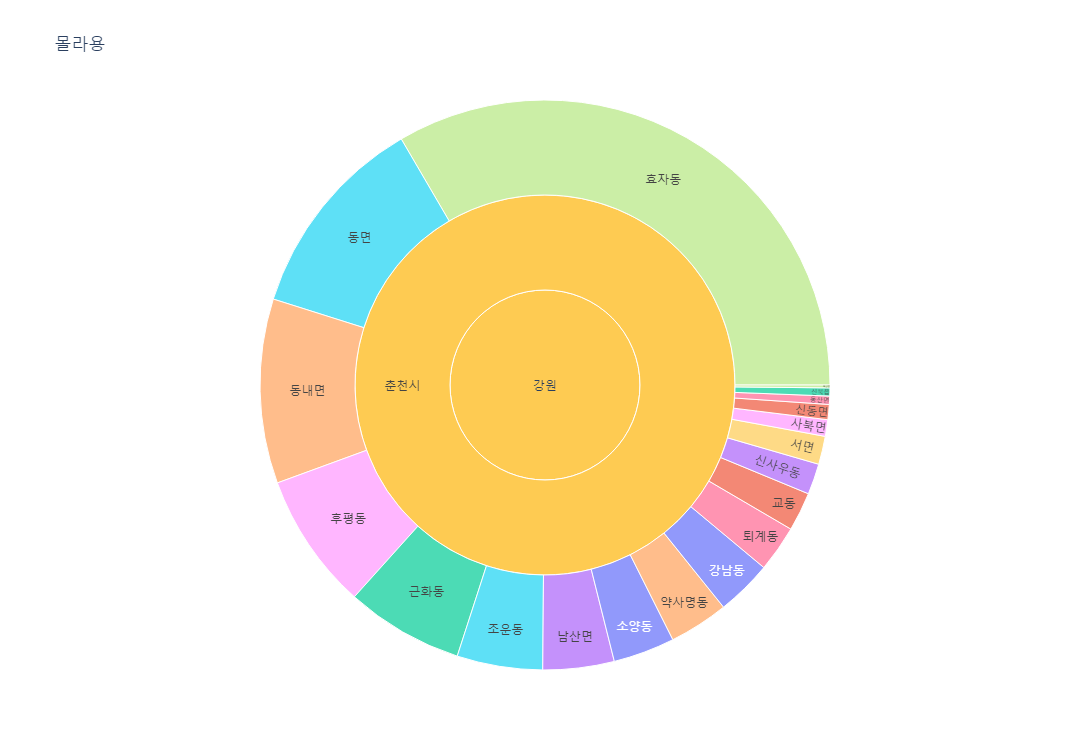

In [102]:
fig = px.sunburst(df_sample,
                  path=["시도", "시군구", "읍면동"],
                  values='이용자수',
                  title="몰라용",
                  width=750, height=750,
                  color= '읍면동')
fig.show()